# Zpracování rotačních spekter $N_2(C\,^3\Pi_g\rightarrow B\,^3\Pi_u)$

V atmosférických výbojích často pozorujeme záření molekuly dusíky v důsledku přechodu $N_2(C\,^3\Pi_g\rightarrow B\,^3\Pi_u)$. Ve starší literatuře se setkáme s označením "*druhý pozitivní systém*". Většina vibračních pásů tohoto systému se nachází v blízké UV oblasti a zasahuje i do viditelné části spektra. Toto záření je tedy často původcem charakteristické fialové barvy atmosférických výbojů.  

S rostoucí teplotou se více populují stavy s vyšším rotačním číslem. Ve spektrech se to projevuje tak, že roste relativní intenzita části pásů směrem ke kratším vlnovým délkám (tedy směrem "doleva").

Toho se dá využít k rychlému odhady teploty, pokud máme k dispozici kalibrační křivku 

$$
\frac{I_0}{ I_1}= f(T, {\rm integrační~limity})
$$

/home/janvorac/wheel/packages/massiveOES/massiveOES/data/N2CB.db


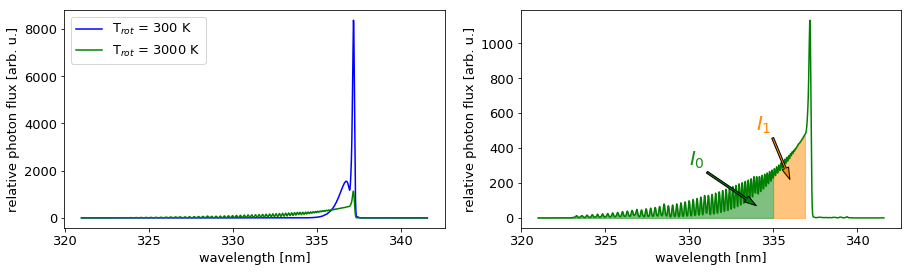

In [1]:
#kod v teto bunce neni soucasti lekce,
#presto ho ale netajime

import massiveOES
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import colors as mcolors
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

N2 = massiveOES.SpecDB('N2CB.db')
spec_cold = N2.get_spectrum(Trot=300, Tvib=300, wmin=325, wmax=337.6)
spec_hot = N2.get_spectrum(Trot=3000, Tvib=3000, wmin=325, wmax=337.6)
dump=spec_cold.refine_mesh()
dump=spec_hot.refine_mesh()

spec_cold.convolve_with_slit_function(gauss=5e-2)
spec_hot.convolve_with_slit_function(gauss=5e-2)

plt.rcParams['font.size'] = 13
plt.rcParams['figure.figsize'] = (15,4)

fig, axs = plt.subplots(1,2)

axs[0].plot(spec_cold.x, spec_cold.y, color='blue', label = 'T$_{rot}$ = 300 K')
axs[0].plot(spec_hot.x, spec_hot.y, color='green', label = 'T$_{rot}$ = 3000 K')

axs[0].legend(loc='upper left')
axs[0].set_xlabel('wavelength [nm]')
axs[0].set_ylabel('relative photon flux [arb. u.]')

int_lims = 320, 335, 336.9

axs[1].plot(spec_hot.x, spec_hot.y, color='green', label = 'T$_{rot}$ = 3000 K')
axs[1].fill_between(spec_hot.x, spec_hot.y, 
                    where=(spec_hot.x > int_lims[0]) & (spec_hot.x<int_lims[1]),
                    color='green', alpha=0.5)
axs[1].fill_between(spec_hot.x, spec_hot.y, 
                    where=(spec_hot.x > int_lims[1]) & (spec_hot.x<int_lims[2]),
                    color='darkorange', alpha=0.5)

axs[1].annotate('$I_0$', xy=(334, 70), xytext = (330, 300), 
                arrowprops=dict(facecolor='green', width = 2, headwidth=7),
                color = 'green', alpha=0.9, size=20)

axs[1].annotate('$I_1$', xy=(336, 220), xytext = (334, 500), 
                arrowprops=dict(facecolor='darkorange', width = 2, headwidth=7),
                color = 'darkorange', alpha=1, size=20)


axs[1].set_xlabel('wavelength [nm]')
txt = axs[1].set_ylabel('relative photon flux [arb. u.]')


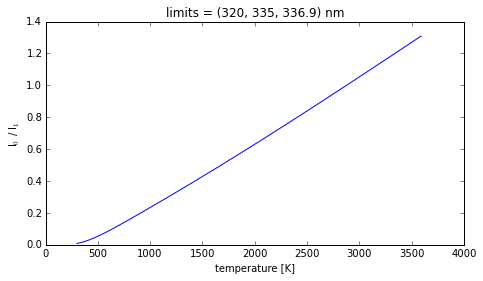

In [2]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

cal = numpy.genfromtxt('N2spec/calibration.txt')

plt.rcParams['figure.figsize'] = (7.5,4)
ax = plt.plot(cal[:,0], cal[:,1])

plt.xlabel('temperature [K]')
plt.ylabel('I$_0$ / I$_1$')

txt = plt.title('limits = (320, 335, 336.9) nm')


## Úkoly

1. Projděte všechny soubory v adresáři `N2spec`. Každý z nich obsahuje dusíkové spektrum získané při určité teplotě. Výše popsanou metodou s využitím kalibrační křivky (`N2spec/calibration.txt`) přiřaďte každému souboru správnou teplotu. 
2. Jméno každého souboru skrývá souřadnice x a y. Vyneste získané hodnoty teploty do dvourozměrného pole podle těchto souřadnic a vykreslete takto získaný obraz.

Můžeme začít tím, že zjistíme, co se v daném adresáři skrývá:

In [3]:
!ls N2spec/ | head #!ls vypíše obsah adresáře, head jej omezí na prvních 10 řádků

calibration.txt
y0x0.txt
y0x10.txt
y0x11.txt
y0x12.txt
y0x13.txt
y0x14.txt
y0x15.txt
y0x16.txt
y0x17.txt
ls: write error: Broken pipe


Předchozí přístup vlastně nevyužívá python. Pro práci s obsahem adresářů je v pythonu např. knihovna `glob`. S její pomocí můžeme zjistit, kolik souborů je třeba zpracovat. 

In [6]:
import glob

filelist = glob.glob('N2spec/y*x*.txt')

print('Dnes zpracujeme ' + str(len(filelist)) + ' souborů')

Dnes zpracujeme 2496 souborů


Měli bychom si ověřit, jakou mají naše soubory strukturu:

In [8]:
!head N2spec/y0x10.txt 

Vidíme, že soubory skrývají spektra ve dvou sloupcích oddělených tabulátorem. První sloupec obsahuje údaje o vlnové délce (podle něj tedy můžeme rozhodnout, v jakém intervalu budeme integrovat), ve druhém sloupci najdeme intenzitu, tedy to, co bylo ve výše ukázaných grafech na ose y. První řádek obsahuje hlavičku a začíná znakem "#". Toto je tedy symbol označující komentáře - každý řádek od tohoto symbolu dál by měl být při načítání přeskočen. 

Pro načítání takovýchto souborů nám poslouží funkce `numpy.genfromtxt()`.

In [9]:
import numpy

In [10]:
numpy.genfromtxt?
#parametr converters umozni zpracovat i nestandardni vstupy
#napr. desetinna carka misto tecky

In [11]:
sample = numpy.genfromtxt(filelist[0], comments='#')

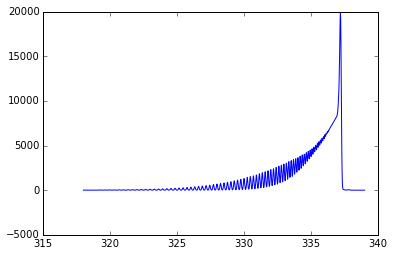

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(sample[:,0], sample[:,1])
#dvojtečková notace [:,0]: čti jako "vezmi všechny řádky, nultý sloupec"

A jak se počítá integrál? Podívejme se na funkci `numpy.trapz`. 

In [10]:
numpy.trapz?

`trapz` sice umí spočítat integrál, ale neumí se omezit na daný interval. Na to budeme využívat výběr z pole s podmínkou.

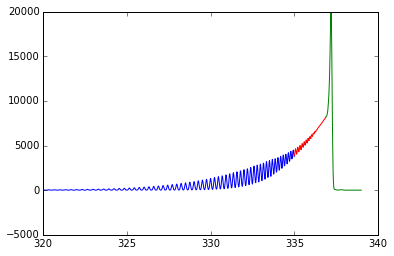

In [13]:
condition0 = (sample[:,0] > 320) & (sample[:,0] < 335)
condition1 = (sample[:,0] > 335) & (sample[:,0] < 336.9)
condition2 = sample[:,0] > 336.9

plt.plot(sample[condition0,0], sample[condition0,1], color = 'blue')
plt.plot(sample[condition1,0], sample[condition1,1], color = 'red')
plt.plot(sample[condition2,0], sample[condition2,1], color = 'green')

Můžeme tedy přistoupit k výpočtu obou integrálů i jejich podílu.

In [14]:
I0 = numpy.trapz(y = sample[condition0,1], x = sample[condition0,0])
I1 = numpy.trapz(y = sample[condition1,1], x = sample[condition1, 0])

I0_over_I1 = I0 / I1
print(I0_over_I1)

0.978714518441


Teď už jen zbývá správně použít kalibrační křivku a k podílu integrálů přiřadit správnou teplotu. Soubor musíme nejdříve načíst. Nejdřív zkontrolujeme, zda můžeme zase použít `numpy.genfromtxt` bez zvlzvláštních nastavení: 

In [15]:
!head N2spec/calibration.txt
#hurá, půjde to po dobrém

In [16]:
cal = numpy.genfromtxt('N2spec/calibration.txt')
condition_temp = (cal[:,1] == I0_over_I1)
print(cal[condition_temp,0])

[]


Jenomže přesná hodnota `I0_over_I1` v souboru `calibration.txt` není! Co teď?

Budeme muset použít google. Klíčová slova: **numpy find nearest value**.

.

.

.

.

.

.

(obrázek tu máte, ale přece to nebudete opisovat...)

<img src="http://physics.muni.cz/~janvorac/stack_overflow.png"></img>

In [17]:
def find_nearest(array,value):
    idx = (numpy.abs(array-value)).argmin()
    return idx

In [24]:
nearest_index = find_nearest(cal[:,1], I0_over_I1)
print(nearest_index)
print(cal[nearest_index, 0])

253
2830.0


Takže teď už zbývá jenom sepsat výše uvedené do cyklu a vytvořit si vhodnou strukturu na podržení výsledných teplot v paměti. Např. slovník.

In [25]:
temp_dict = {}

for fname in glob.glob('N2spec/y*x*.txt'):
    data = numpy.genfromtxt(fname)
    I0 = numpy.trapz(y = data[condition0,1], x = data[condition0,0])
    I1 = numpy.trapz(y = data[condition1,1], x = data[condition1, 0])
    I0_over_I1 = I0 / I1
    index = find_nearest(cal[:,1], I0_over_I1)
    T = cal[index][0]
    temp_dict[fname] = T

Je třeba dostat informace o souřadnicích ze jména souboru:

In [26]:
xs = [] 
ys = []
for fname in temp_dict:
    #nejdrive rozdelime jmeno souboru podle "/" a vezmeme jen druhy prvek [1]
    #prvni bude vzdy jen tentyz adresar
    fname = fname.split('/')[1] 

    #abychom ziskali y, rozdelime jmenu souboru podle "x" a vezmeme prvni prvek [0]
    y = fname.split('x')[0]
    #jmeno souboru zacina znakem "y", ten preskocime [1:]
    y = int(y[1:])
    ys.append(y)
    
    #tady rozdelime jmeno souboru podle "x" a vezmeme druhy prvek [1]
    x = fname.split('x')[1]
    #zbytek rozdelime podle "." a vezmeme prvni prvek [0]
    x = x.split('.')[0]
    x = int(x)
    xs.append(x)

In [27]:
print(numpy.unique(xs))
print(numpy.unique(ys))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49]


Vidíme, že naše výsledné pole by mělo být 50x50 pixelů velké, aby se do něj data vešla.

In [28]:
result = numpy.zeros((50, 50)) #tady bude vysledek
for i, fname in enumerate(temp_dict):
    #print(i, fname)
    x = xs[i]
    y = ys[i]
    T = temp_dict[fname]
    result[y, x] = T

Pomocí `plt.imshow()` můžeme výsledek vykreslit. 

In [32]:
#plt.imshow(result)
#plt.colorbar()